# Read in the required packages 


In [6]:
#pip install scrublet

In [2]:
# I am using cns_env for this analysis 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, facecolor='white', color_map='viridis')
sc.logging.print_header()


/opt/conda/envs/cns_haem/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 pynndescent==0.5.10


In [2]:
pd.set_option('display.max_rows', 100)  

In [3]:
# I am following the following tutorial from CellGen IT 
# https://github.com/cellgeni/notebooks/blob/master/notebooks/new-10kPBMC-Scanpy.ipynb

# Read in the anndata object spine+skull+meninges scRNA+snRNAseq data 

In [4]:
# Save the anndata with the saved metadata 
# This anndata is missing many skull samples from PCW12 and one sample from spine PCW17

adata=sc.read_h5ad("/home/jupyter/mount/gdrive/Data_Integration/data/combined_spine_skull_meninges_raw_counts_metadata_added_20231018.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 1389501 × 36601
    obs: 'sample_id', 'barcode', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Organ', 'Run_ID', 'Age', 'Anatomical_Site', 'Donor_ID', 'Technology', 'iRODs path', 'Farm Path', 'CellBender_Output_Path', 'Demultiplexed_Barcodes_Location', 'Cell_ID'
    var: 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [6]:
sc.pp.filter_genes(adata, min_cells=20)


filtered out 1887 genes that are detected in less than 20 cells


# Run Standard QC metrics to get total cell count, total gene count, total mitochondrial and total ribosomal DNA % information 

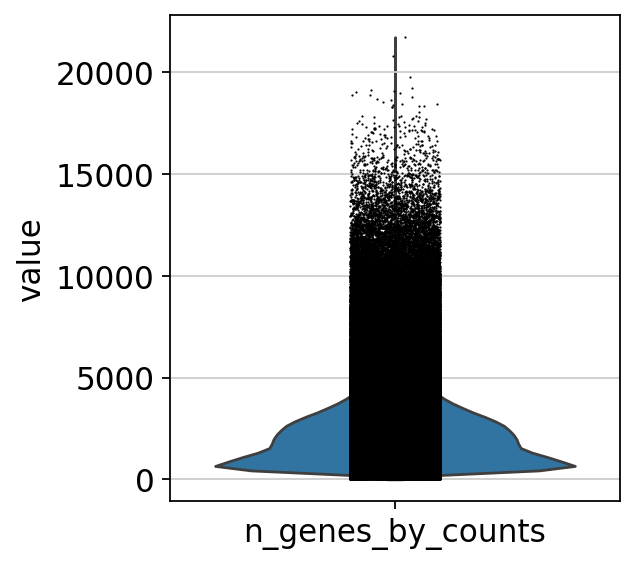

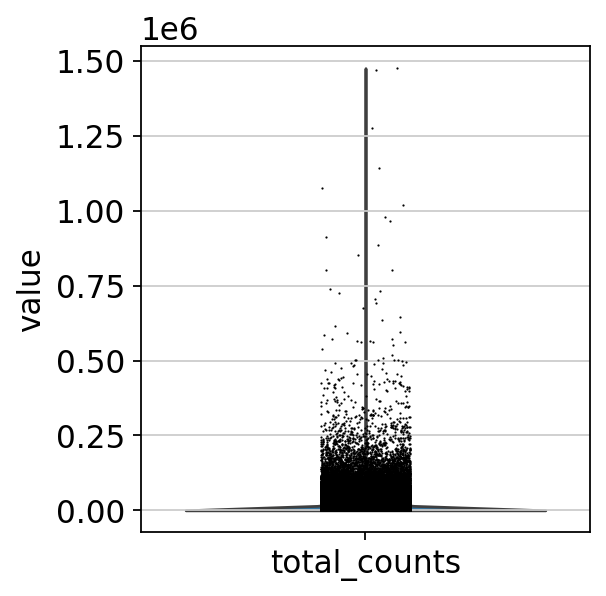

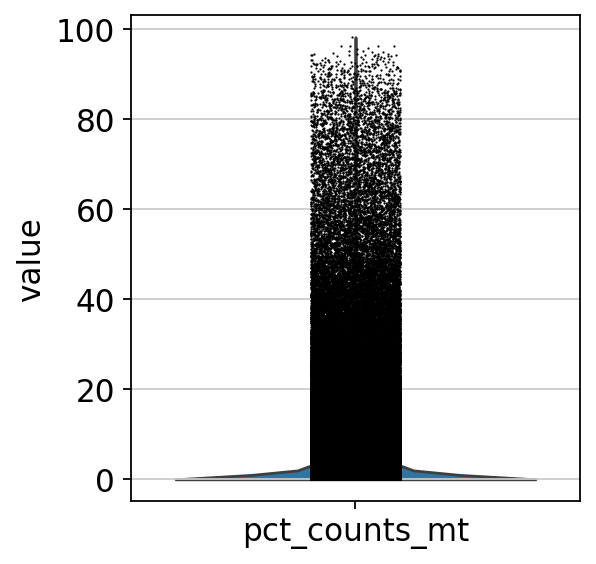

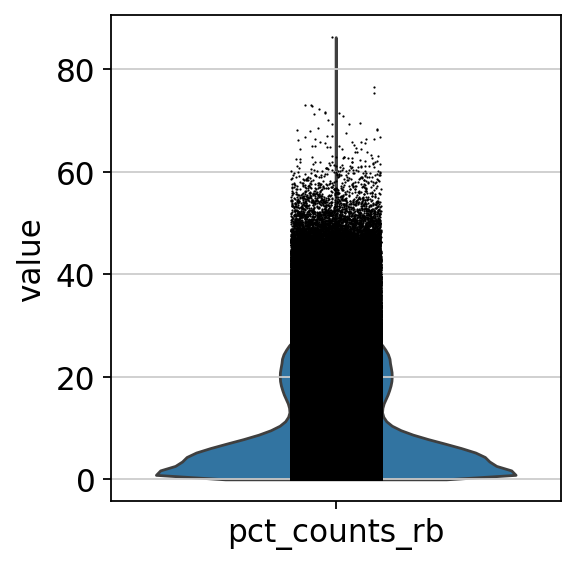

In [11]:
for param in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rb']:
    sc.pl.violin(adata, param)

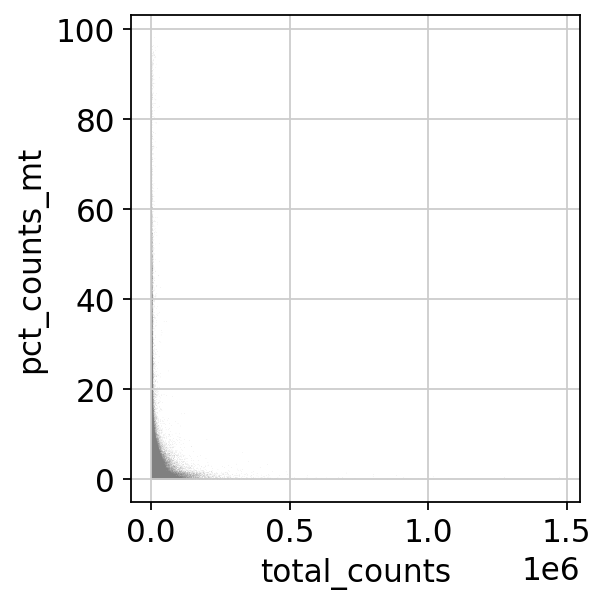

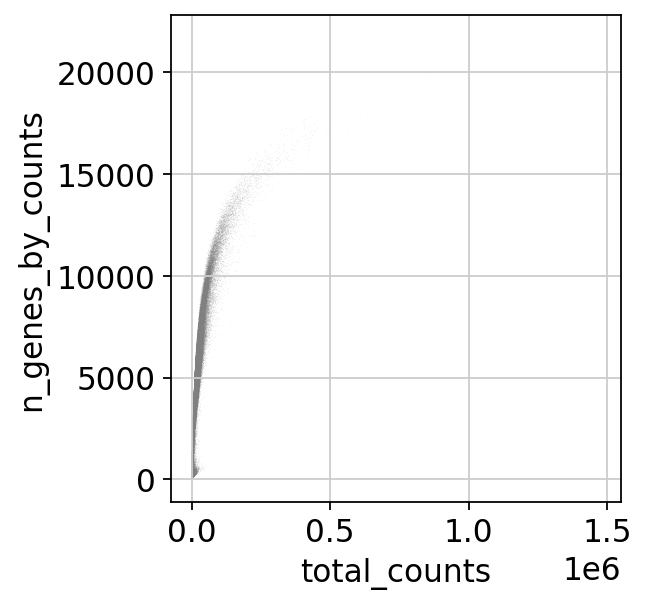

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

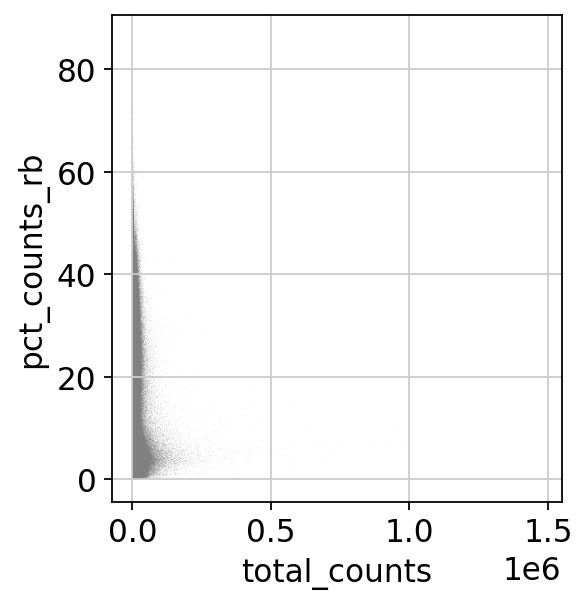

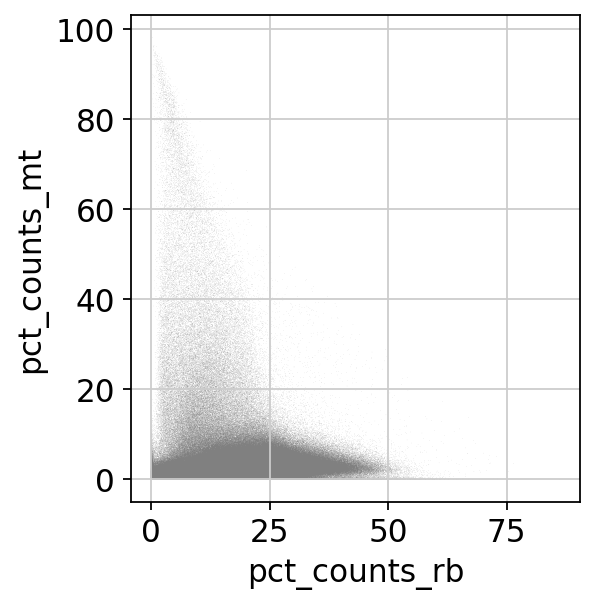

In [14]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_rb')
sc.pl.scatter(adata, x='pct_counts_rb', y='pct_counts_mt')

In [7]:
conditions = [
    (adata.obs['total_counts']  < 1500),
    (adata.obs['n_genes_by_counts'] < 500),
    (adata.obs['pct_counts_mt'] > 20),
    (adata.obs['pct_counts_rb'] > 30),
   (adata.obs['pct_counts_rb'] <= 30)& (adata.obs['pct_counts_mt'] <= 20) & (adata.obs['n_genes_by_counts'] >= 500) & (adata.obs['total_counts']  >=1500)
]

In [8]:
values = ['Low_total_count', 'Low_nFeature', 'High_MT',"High_RB", 'Pass']
adata.obs['QC'] = np.select(conditions, values)
adata.obs['QC'] = adata.obs['QC'].astype('category')
adata.obs[['total_counts','n_genes_by_counts','pct_counts_mt','QC']].head(10)

,total_counts,n_genes_by_counts,pct_counts_mt,QC
Cell_ID,,,,
HCA_BN_F12863835_and_HCA_BN_F12865000_GTTACTCGTCTATCGT-1,54210.0,8387,1.007194,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_GGCTCAATCGGTCAAT-1,52798.0,8411,1.007614,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_TTGTTGCGTCGCAATA-1,44005.0,7014,0.845358,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_CACATAATCATGCCTC-1,44192.0,7477,0.563450,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_ATGCCTGAGACCATAC-1,43907.0,7536,0.835858,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_CATCCCAGTGACCTGG-1,40883.0,7106,1.090918,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_TCCTCAATCATTACGA-1,41219.0,7817,1.705524,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_CTCGCTAGTTAATGCG-1,38673.0,7023,1.124816,Pass
HCA_BN_F12863835_and_HCA_BN_F12865000_TACTTGTTCAAGACTC-1,37573.0,6681,1.985468,Pass


In [9]:
adata.obs['QC'].value_counts()

QC
Pass               1025432
Low_total_count     258998
High_RB              82782
High_MT              12943
Low_nFeature          9346
Name: count, dtype: int64

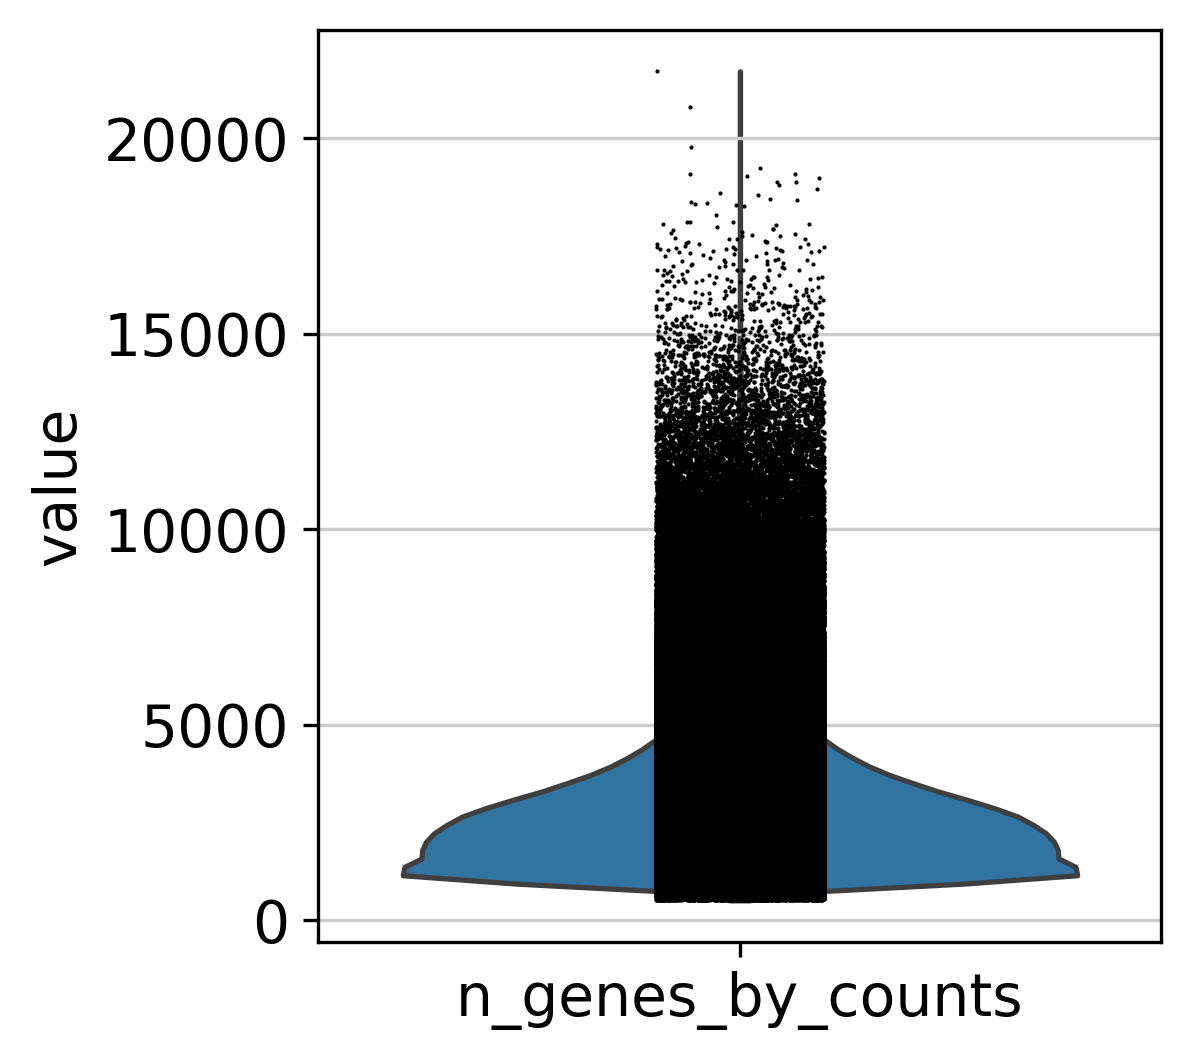

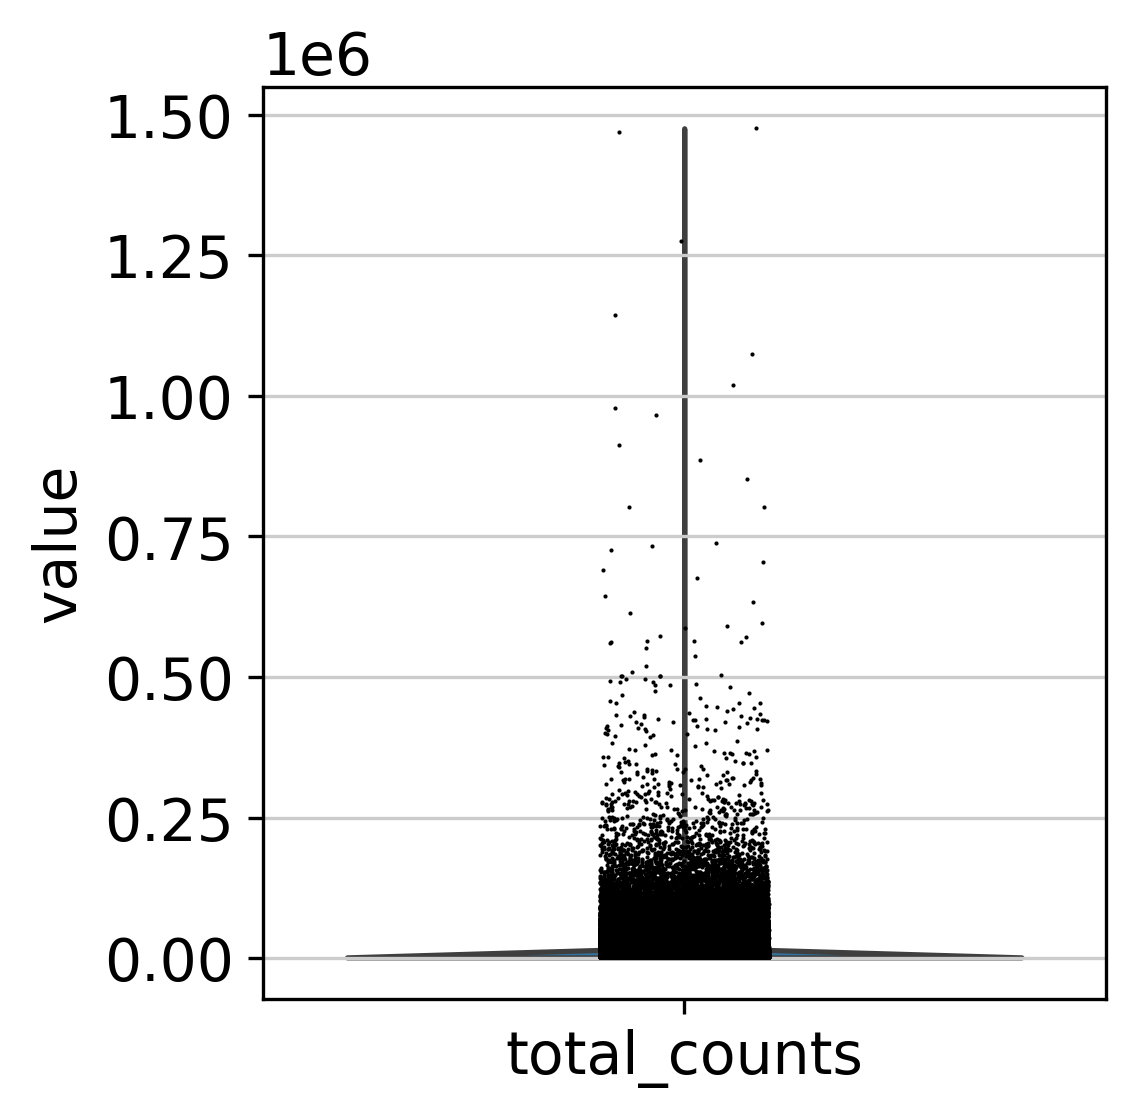

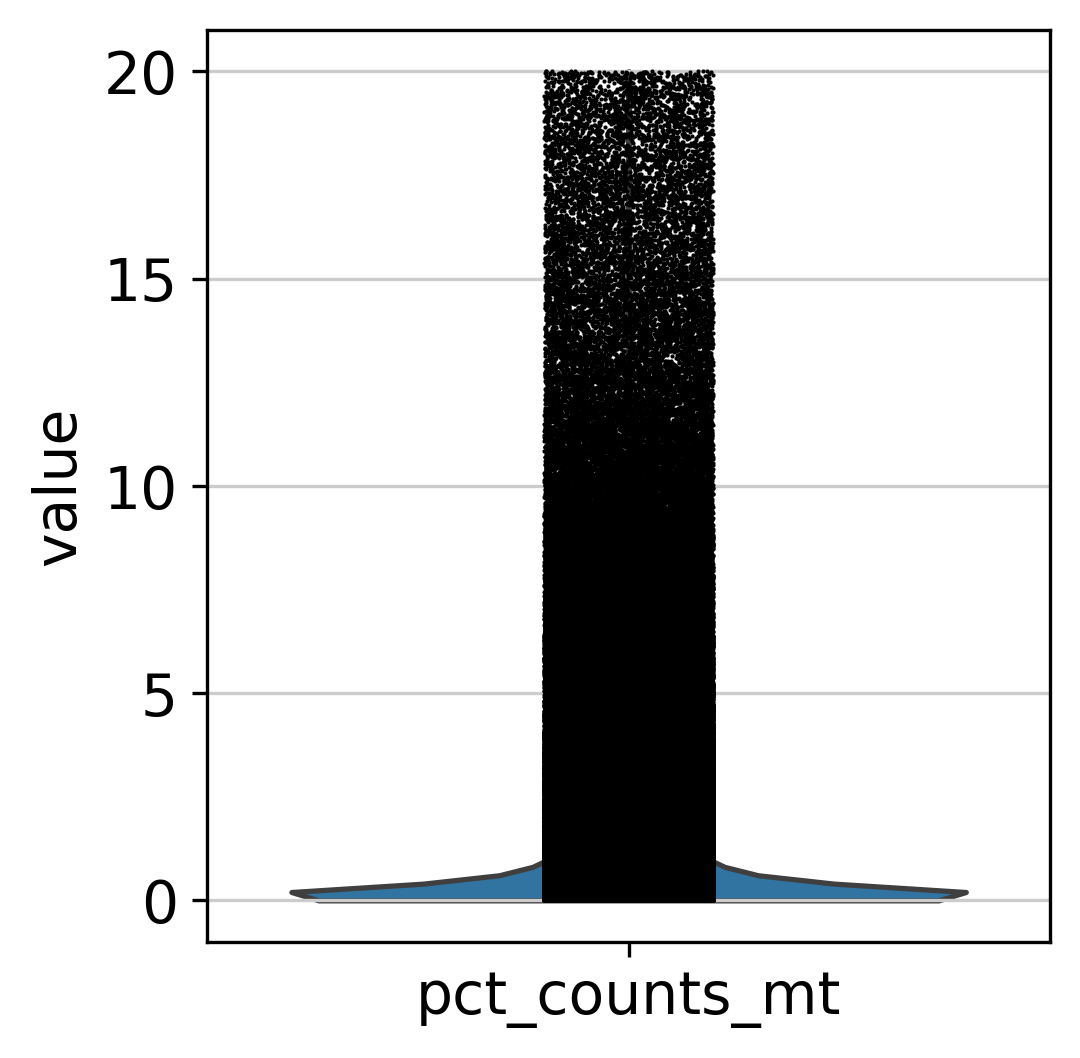

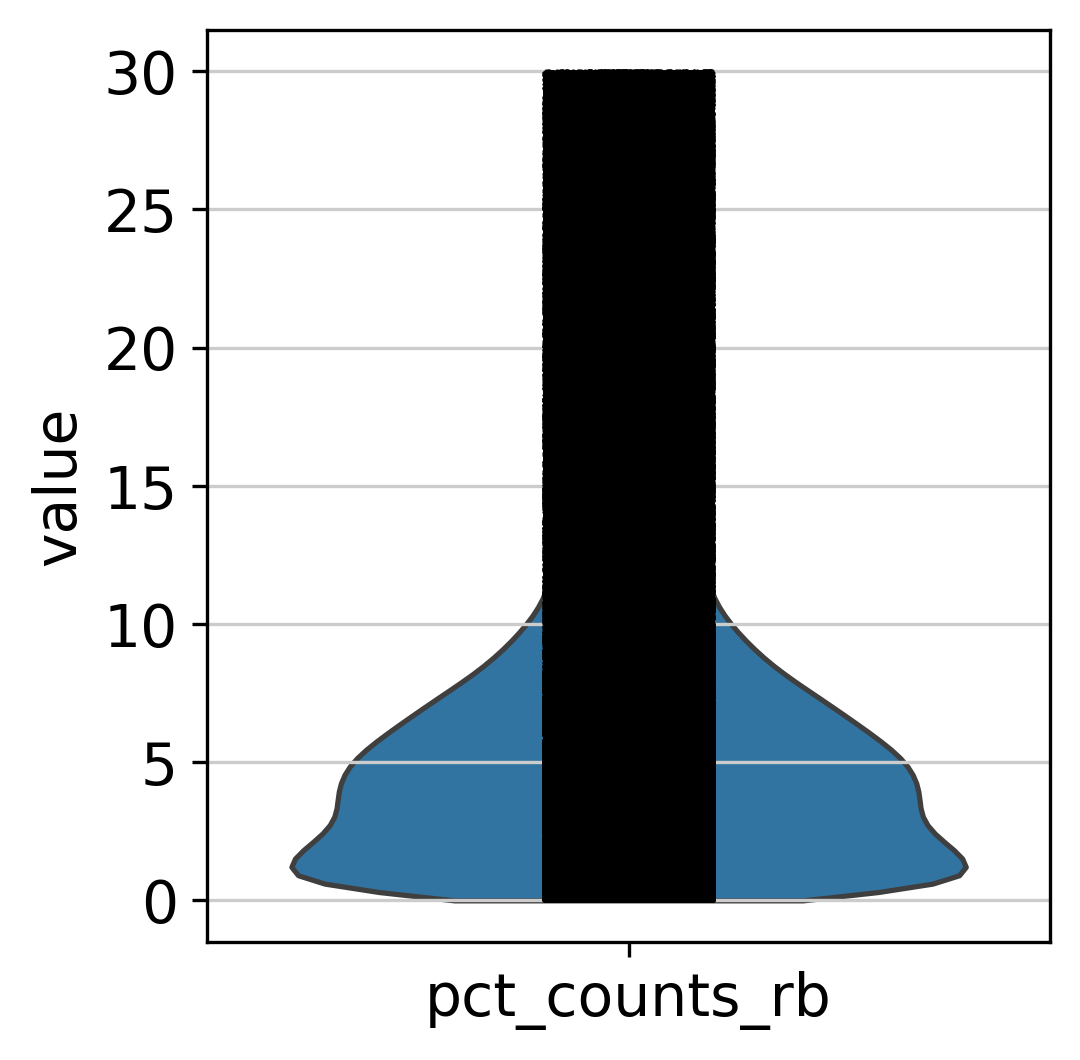

In [10]:
for param in ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_rb']:
    sc.pl.violin(adata[adata.obs['QC'] == 'Pass'],param)

# Filter out Cells

In [11]:
adata= adata[adata.obs['QC'] == 'Pass']

In [48]:
#adata.raw= adata

In [14]:
adata.layers['raw_counts'] = adata.X

/tmp/ipykernel_21007/3418901059.py:1: ImplicitModificationWarning: Setting element `.layers['raw_counts']` of view, initializing view as actual.
  adata.layers['raw_counts'] = adata.X


# Find HVGs 

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:15)


In [16]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)


extracting highly variable genes
    finished (0:01:25)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [17]:
adata.write_h5ad("/home/jupyter/mount/gdrive/Data_Integration/data/combined_anndata_qc_filtered_hvg_genes_20231019.h5ad")

In [18]:
adata

AnnData object with n_obs × n_vars = 1025432 × 34714
    obs: 'sample_id', 'barcode', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Organ', 'Run_ID', 'Age', 'Anatomical_Site', 'Donor_ID', 'Technology', 'iRODs path', 'Farm Path', 'CellBender_Output_Path', 'Demultiplexed_Barcodes_Location', 'Cell_ID', 'QC'
    var: 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'raw_counts'

In [19]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:04:32)


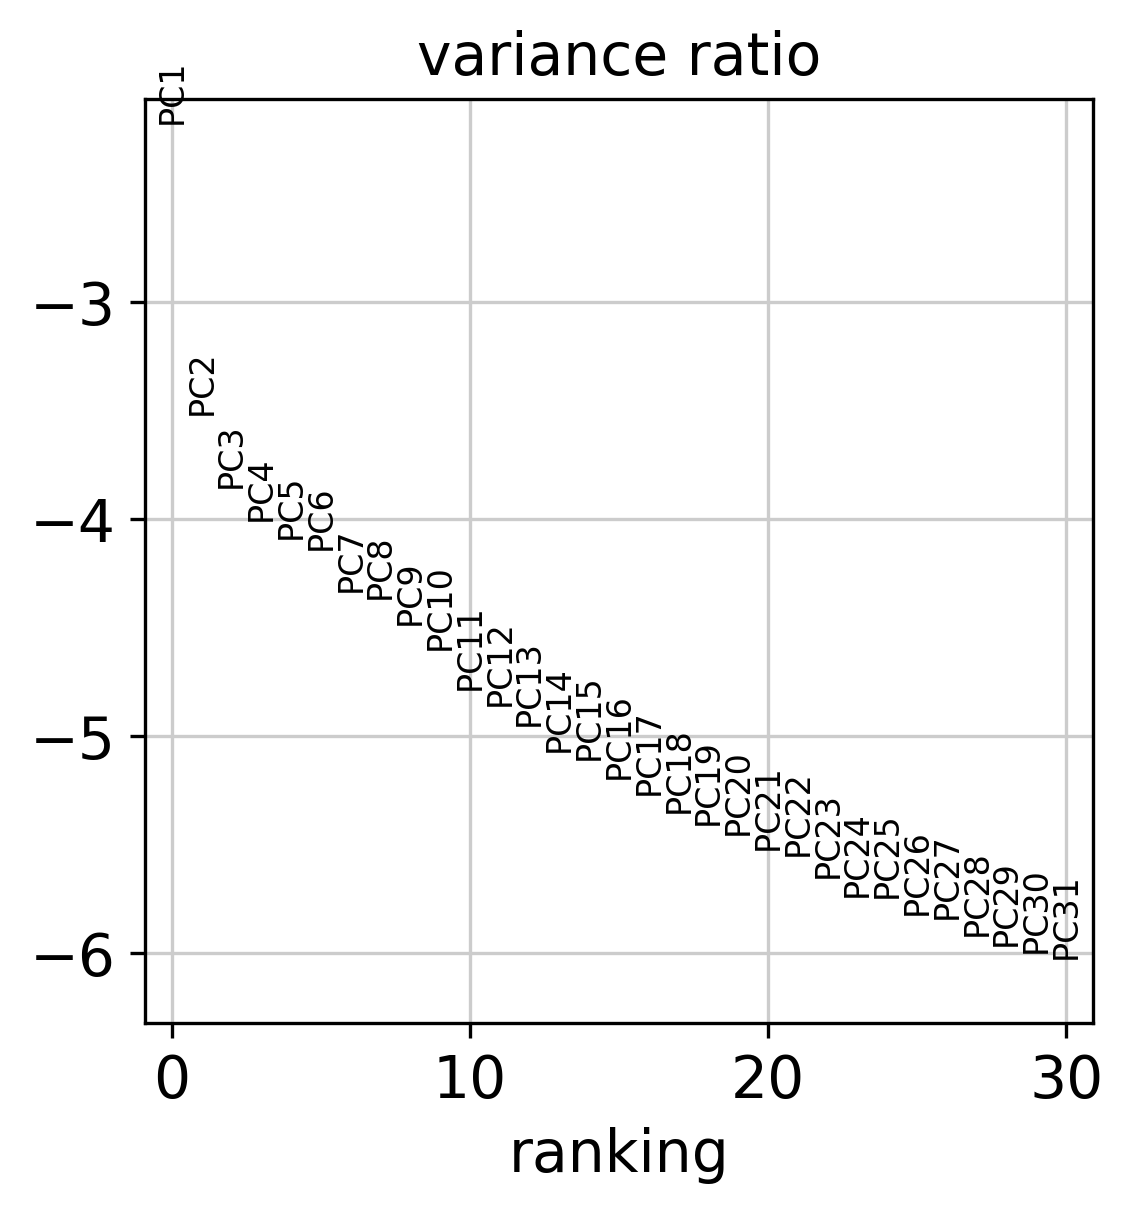

In [20]:
sc.pl.pca_variance_ratio(adata, log=True)


In [21]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:21)


In [24]:
adata

AnnData object with n_obs × n_vars = 1025432 × 34714
    obs: 'sample_id', 'barcode', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Organ', 'Run_ID', 'Age', 'Anatomical_Site', 'Donor_ID', 'Technology', 'iRODs path', 'Farm Path', 'CellBender_Output_Path', 'Demultiplexed_Barcodes_Location', 'Cell_ID', 'QC'
    var: 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.pl.umap(adata, color=['LYZ','MS4A1','CD3D'])
